			Choose an option:
=========== Press 1 to Use the sample Python program ===========
=========== Press 2 to Enter your own source code ===========
=========== Press 3 to Enter path of your source program file ===========


User Selection: Provide Program file

 # List of numbers from 1 to 10
numbers = list( range ( 1, 11 ))  # This is a simple list from 1 to 10

# Function to calculate the sum of even numbers using bitwise operator
def sum_of_even_numbers( nums ):
    total = 0
    for num in nums:
        # Bitwise operation for even check: number & 1 should be 0 if even
        if ( num & 1 ) == 0:  # bitwise operator combined
            total += num  # Add even number to the total
    return total

# Main code block
if __name__ == "__main__":
    # Calculate the sum of even numbers from the list
    even_sum = sum_of_even_numbers( numbers )
    
    # Output the sum of even numbers
    print( "Sum of even numbers:", even_sum)

    # Check if a number is even or odd using bitwise o

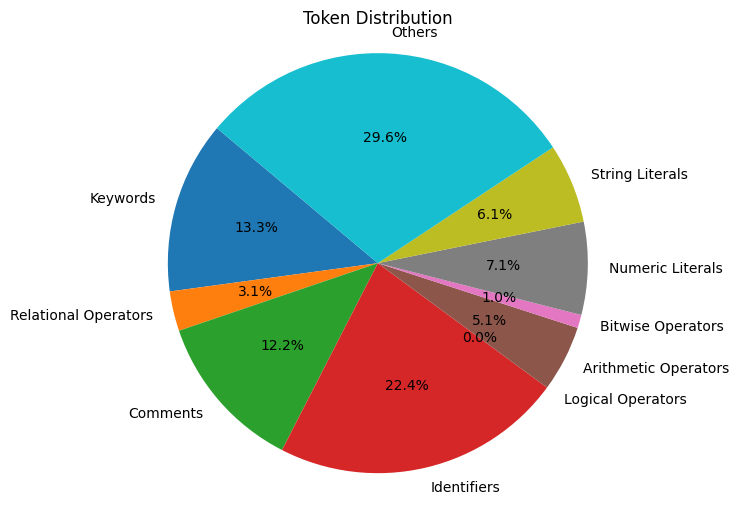

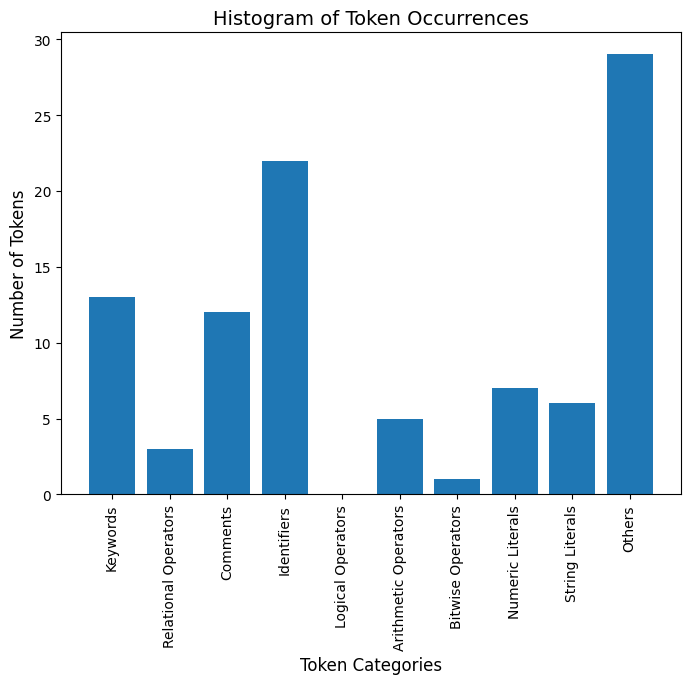

In [8]:
import re
import matplotlib.pyplot as plt
import keyword  # Import the keyword module to get the list of Python keywords

python_keywords = keyword.kwlist

# Additional words to include in the keyword regex
extra_keywords = ["print", "input"]

# Combine the existing Python keywords with additional ones
all_keywords = python_keywords + extra_keywords

# Create a regular expression for all keywords
keywords_regex = r'\b(?:' + '|'.join(all_keywords) + r')\b'

# Define relational operators in Python
relational_operators = ['==', '!=', '>', '<', '>=', '<=']  # All relational operators in Python
relation_operators_regex = r'|'.join([re.escape(op) for op in relational_operators])  # Create a regex

# Define logical operators in Python
logical_operators = ['and', 'or', 'not']  # All logical operators in Python
logical_operators_regex = r'\b(?:' + '|'.join(logical_operators) + r')\b'  # Create a regex with word boundaries

# Define valid Python identifiers
identifiers_regex = r'\b[a-zA-Z_][a-zA-Z0-9_]*\b'

# Define regex for comments in Python
comments_regex = r'#.*'  # Match everything from '#' to the end of the line

# Define regex for numeric literals (integers and floats)
numeric_literals_regex = r'\b\d+(\.\d+)?\b'
numeric_split_regex = re.compile(r'(\d+(\.\d+)?)')  # Matches integers and floats

# Define regex for string literals (single and double-quoted strings)
string_literals_regex = r"['\"].*?['\"]"

# Define regex for operators (arithmetic, assignment, bitwise)
arithmetic_operators_regex = r'[-+*/%=]'
bitwise_operators_regex = r'[&|^~]'

# Function to tokenize the source code
def tokenize_source_code(source_code):
    # Tokenize the source code
    tokens = re.findall(rf'{keywords_regex}|{relation_operators_regex}|{logical_operators_regex}|{identifiers_regex}|{comments_regex}|{string_literals_regex}|[^\s]+', source_code)
    return tokens

# Function to categorize tokens
def categorize_tokens(tokens):
    categories = {
    'Keywords': [],
    'Relational Operators': [],
    'Comments': [],
    'Identifiers': [],
    'Logical Operators': [],
    'Arithmetic Operators': [],
    'Bitwise Operators': [],
    'Numeric Literals': [],
    'String Literals': [],
    'Others': []
    }
    
    # Helper function to check if a token is a complete quoted string
    def is_complete_string_literal(token):
        return (
            token[0] == token[-1]
            and token[0] in ["'", '"']
            and len(token) > 1
        )
    
    # Helper function to check if a token contains incomplete string parts
    def extract_string_parts(token):
        # Find the opening and closing quotes
        if token[0] in ["'", '"']:
            closing_pos = token.find(token[0], 1)  # Find the corresponding closing quote
            if closing_pos > 1:
                string_literal = token[:closing_pos + 1]
                remaining_part = token[closing_pos + 1:]  # Everything after the closing quote
                return string_literal, remaining_part
        return None, None
    
    for token in tokens:
        if re.match(keywords_regex, token):  # Use the dynamic regex for Python keywords
            categories['Keywords'].append(token)
        elif re.match(relation_operators_regex, token):
            categories['Relational Operators'].append(token)
        elif re.match(comments_regex, token):
            categories['Comments'].append(token)
        elif re.match(identifiers_regex, token):
            categories['Identifiers'].append(token)
        elif re.match(logical_operators_regex, token):
            categories['Logical Operators'].append(token)
        elif re.match(arithmetic_operators_regex, token):
            categories['Arithmetic Operators'].append(token)
        elif re.match(bitwise_operators_regex, token):
            categories['Bitwise Operators'].append(token)
        # Check if the token contains a numeric literal with additional characters
        elif re.match(numeric_literals_regex, token):
            # Extract the numeric part and separate the rest
            match = numeric_split_regex.search(token)
            if match:
                numeric_part = match.group(1)
                non_numeric_part = token[len(numeric_part):]  # Remaining part after the number
                categories['Numeric Literals'].append(numeric_part)  # Add the numeric part to 'Numeric Literals'
                if non_numeric_part:
                    categories['Others'].append(non_numeric_part)  # Add the non-numeric part to 'Others'
        elif is_complete_string_literal(token):
            # If it's a complete string literal, add it to 'String Literals'
            categories['String Literals'].append(token)
        else:
            # If it's a partial or other token, check for split cases
            string_literal, remaining_part = extract_string_parts(token)
            if string_literal:
                categories['String Literals'].append(string_literal)  # Add the string literal
                if remaining_part:
                    categories['Others'].append(remaining_part)  # Add anything left as 'Others'
            else:
                categories['Others'].append(token)  # Default to 'Others' if no clear match
         
            
    return categories

# Function to plot token distribution
def plot_token_distribution(categories):
    labels = categories.keys()
    sizes = [len(tokens) for tokens in categories.values()]

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Token Distribution')
    plt.show()

# Function to plot a histogram for token occurrences with vertical x-axis labels
def plot_token_histogram(categories):
    labels = list(categories.keys())  # Get the category names for the x-axis
    counts = [len(tokens) for tokens in categories.values()]  # Count of tokens in each category
    
    plt.figure(figsize=(8, 6))  # Set figure size
    plt.bar(labels, counts)  # Plot the histogram
    
    # Set x and y axis labels
    plt.xlabel('Token Categories', fontsize=12)
    plt.ylabel('Number of Tokens', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, fontsize=10)  # Rotate labels by 90 degrees (vertical)
    
    # Set the title for the histogram
    plt.title('Histogram of Token Occurrences', fontsize=14)
    plt.show()  # Display the histogram

# Main function
def main():
    # Ask user to choose between the sample program or custom input
    print("\t\t\tChoose an option:")
    print("=========== Press 1 to Use the sample Python program ===========")
    print("=========== Press 2 to Enter your own source code ===========")
    print("=========== Press 3 to Enter path of your source program file ===========")
    
    choice = int(input("Enter your choice (1 or 2 or 3): "))

    # Provide a default sample program if choice is 1
    if choice == 1:
        source_code = """
        # This is a sample Python program
        def greet(name):
            print( "Hello" + name + "!" )
            # End of the function
        
        # Main code
        if __name__ == "__main__":
            greet( "World" )
        """
        print("\n\nUser Selection: Sample Program\n\n",source_code,"\n")
    # Otherwise, take custom source code input from the user
    elif choice == 2:
        source_code = input("Enter your source code:\n")
        print("\n\nUser Selection: Provide Program in input that is\n\n",source_code,"\n")
    elif choice == 3:
        source_code_file_path = input("Please enter the path to your source code file: ")
        with open(source_code_file_path, 'r') as file:
            source_code = file.read()
        print("\n\nUser Selection: Provide Program file\n\n",source_code,"\n")    
        
    # Tokenize the source code
    tokens = tokenize_source_code(source_code)

    # Categorize tokens
    categories = categorize_tokens(tokens)
    
    print("******************* Information of Source Program *******************")

    # Print token distribution with proper unpacking
    for category, tokens_list in categories.items():
        # Display the category name and total count of tokens in this category
        print(f'\nTotal {category}: {len(tokens_list)} tokens')
        # Display the tokens for each category
        print(f'{category} in program:')
        i=1
        for token in tokens_list:
            print(f'{i}) \t{token}')  # Print each token within the category
            i=i+1

    # Plot token distribution
    plot_token_distribution(categories)
    
     # Plot the histogram of token occurrences
    plot_token_histogram(categories)

if __name__ == "__main__":
    main()